# Phylogenetics course

### practice instructions

## Distance methods

In this assignment we will construct phylogenies with distance based methods. Do all the exercises preferably in the provided order. You will practice the most basic tasks related to a general phylogenetic analysis including importing data, calculating phylogenies with different, alternative options, and generating tree plots.

The software what will be used in this practice is the R statistical environment with the following supporting libraries: **seqinr**, **ape**, and **phangorn**. This is a free and open-source software setting which is available for you also later on, therefore you are able to apply the learned skills and approaches in your own research or study projects.

### Files you need:
**IL6_protein.aln** – This file contains protein sequences of interleukin 6 from six mammal and a bird species. The sequences were aligned using Clustal Omega.

**IL6_mRNA.aln** – This file contains coding cDNA sequences of interleukin 6 gene from six mammal and a bird genomes. The sequences were aligned using Clustal Omega.

## Exercises

### 1. Set up the environment

**1.1.** R is a general software focused on the statistical analysis of large scale data. Supporting libraries, such as sequinr here, are used to provide task and topic specific functionality. You have to load libraries should be loaded before you can use the functions inside. We will load the seqinr and ape libraries here:

In [41]:
# install.packages("seqinr", repos="http://R-Forge.R-project.org")
# install.packages("ade4")
# install.packages("ape")
# install.packages("phangorn")

In [5]:
library(seqinr)
library(ape)

Remember, if you restart R, you have to load the libraries again to repeat or continue your tasks.

**1.2.** We have to tell R the directory, where we want to work. Usually, this directory contains the input files and we want to save the results files there. When R starts it has configuration specific working directory what we can easily see:

In [6]:
getwd()

[1] "D:/Studies/Bioinfó/Gyak/08_phylogenetics"

### 2. Load data files

**2.1.** R accesses data from local files using **read()** type functions. Many data types and file types has specialized functions. We will use **read.alignment()** function from seqinr package to access Clustal Omega aligned sequences.

In [7]:
ali.prot<-read.alignment("fasta_files/IL6_protein.aln",format="fasta")
ali.rna<-read.alignment("fasta_files/IL6_mRNA.aln",format="fasta")

**2.2.** These create complex representations of the alignments in the **ali.prot** and **ali.rna** variables. We can have a good overview of their content by simply typing in variable names or using the **str()** function.

In [8]:
ali.prot
str(ali.prot)

$nb
[1] 7

$nam
[1] "Homo"   "Pan"    "Macaca" "Canis"  "Mus"    "Rattus" "Gallus"

$seq
$seq[[1]]
[1] "mns------------------fstsafgpvaf---slglllvlpaafpapvppgedskdvaa-----phrqpltsseridkqiryildgisalrketcnksnmcesskealaennlnlpkmaekdgcfqsgfneetclvkiitgllefevyleylqnrfess-eeqaravqmstkvliqflqkkaknldaittpdpttnaslltklqaqnqwlqdmtthlilrsfkeflqsslralrqm--------"

$seq[[2]]
[1] "mns------------------vstsafgpvaf---slglllvlpaafpapvppgedskdvaa-----phrqpltsseridkqiryildgisalrketcnksnmcesskealaennlnlpkmaekdgcfqsgfneetclvkiitgllefevyleylqnrfess-eeqaravqmstkvliqflqkkaknldaittpdpttnaslltklqaqnqwlqdmtthlilrsfkeflqsslralrqm--------"

$seq[[3]]
[1] "mns------------------fstsafgpvaf---slglllvlpaafpapvlpgedsknvaa-----phsqpltsseridkhiryildgisalrketcnrsnmcesskealaennlnlpkmaekdgcfqsgfnedtclvkiitgllefevyleylqnrfess-eeqaravqmstkvliqflqkkaknldaittpepttnaslltklqaqnqwlqdmtthlilrsfkeflqsnlralrqm--------"

$seq[[4]]
[1] "-----------------------mnslstsaf---slglllvmatafptpgplagdskddat-----snslpltsankveelikyilgkisalrkemcdkf

List of 4
 $ nb : num 7
 $ nam: chr [1:7] "Homo" "Pan" "Macaca" "Canis" ...
 $ seq:List of 7
  ..$ : chr "mns------------------fstsafgpvaf---slglllvlpaafpapvppgedskdvaa-----phrqpltsseridkqiryildgisalrketcnksnmcesskeal"| __truncated__
  ..$ : chr "mns------------------vstsafgpvaf---slglllvlpaafpapvppgedskdvaa-----phrqpltsseridkqiryildgisalrketcnksnmcesskeal"| __truncated__
  ..$ : chr "mns------------------fstsafgpvaf---slglllvlpaafpapvlpgedsknvaa-----phsqpltsseridkhiryildgisalrketcnrsnmcesskeal"| __truncated__
  ..$ : chr "-----------------------mnslstsaf---slglllvmatafptpgplagdskddat-----snslpltsankveelikyilgkisalrkemcdkfnkcedskeal"| __truncated__
  ..$ : chr "mkf------------------lsardfhpvaf----lglmlvtttafptsqvrrgdftedtt-----pn-rpvyttsqvgglithvlweivemrkelcngnsdcmnnddal"| __truncated__
  ..$ : chr "mkf------------------lsardfqpvaf----lglmlltatafptsqvrrgdftedtt-----hn-rpvyttsqvgglityvlreilemrkelcngnsdcmnsddal"| __truncated__
  ..$ : chr "mnftegceatgrrpgsagsrrrraprpgpvallplllplllppaaavp

**2.3.** Some functions in the ape library requires that the alignment is in a specific, **DNAbin format**. We have to convert the alignment object here to convert accordingly:

In [9]:
ali.rna.b<-as.DNAbin(ali.rna)

### 3. Calculate distances

**3.1.** As you have learned from the lecture, there are countless ways to calculate distances between aligned sequences. For protein sequences **dist.alignment()** function can be called, which can calculate the distances either taking into account of mutational similarity of codons or not.

In [10]:
d.prot<-dist.alignment(ali.prot,matrix="similarity")

**3.2.** For the cDNA sequences the **dist.dna()** function will be used from the ape library which offers many evolutionary and mathematical methods via its model parameter. For example, we can use simply the number of different sites as a (not very good) distance measure:

In [11]:
d.rna.n<-dist.dna(ali.rna.b,model="N")

Alternatively, we can use the number of transitions, transversion, the same way, or we can weight the number of differences with the length of the sequences.

In [12]:
d.rna.ts<-dist.dna(ali.rna.b,model="TS")
d.rna.tv<-dist.dna(ali.rna.b,model="TV")
d.rna.raw<-dist.dna(ali.rna.b,model="raw")

**3.3.** Many of the nucleotide substitution models which were mentioned in the lecture (and even more which wasn't) are also usable here:

In [13]:
d.rna.JC69<-dist.dna(ali.rna.b,model="JC69")
d.rna.K80<-dist.dna(ali.rna.b,model="K80")
d.rna.F84<-dist.dna(ali.rna.b,model="F84")
d.rna.TN93<-dist.dna(ali.rna.b,model="TN93")

### 4. Creating trees

**4.1.** Now we have so many matrices, but how to create phylogenetic trees from them? In this practice we will use **Neighbour-Joining alhorithm** which is implemented in the **nj()** function of the ape package. Note that **Minimum Evolution** as **fastme.bal()** or the **BIONJ** as **bionj()** algorithms are available and usable in a very similar manner.

In [14]:
t.prot<-nj(d.prot)

**4.2.** We have now a tree in the **t.prot** variable. Let's get some information about it. How many species are represented on this tree? What are those? Is this a rooted tree?

In [15]:
t.prot$Nnode
t.prot$tip.label
is.rooted(t.prot)

[1] 5

[1] "Homo"   "Pan"    "Macaca" "Canis"  "Mus"    "Rattus" "Gallus"

[1] FALSE

**4.3.** As you see, this tree is not rooted. That is a problem, because almost all further methods need a rooted tree. We can use the **outgroup method** to root this tree. From the list of included species we have seen that **species number 7 is Gallus gallus (chicken)** which is the only bird sequence, all the others are from mammals. Birds are clearly an outgroup compared to the mammal sequences, so we can use it to root the tree:

In [16]:
t.prot<-root(t.prot,outgroup=7,resolve.root=T)

**4.4.** Let's finally see how the tree's graphic representation looks like:

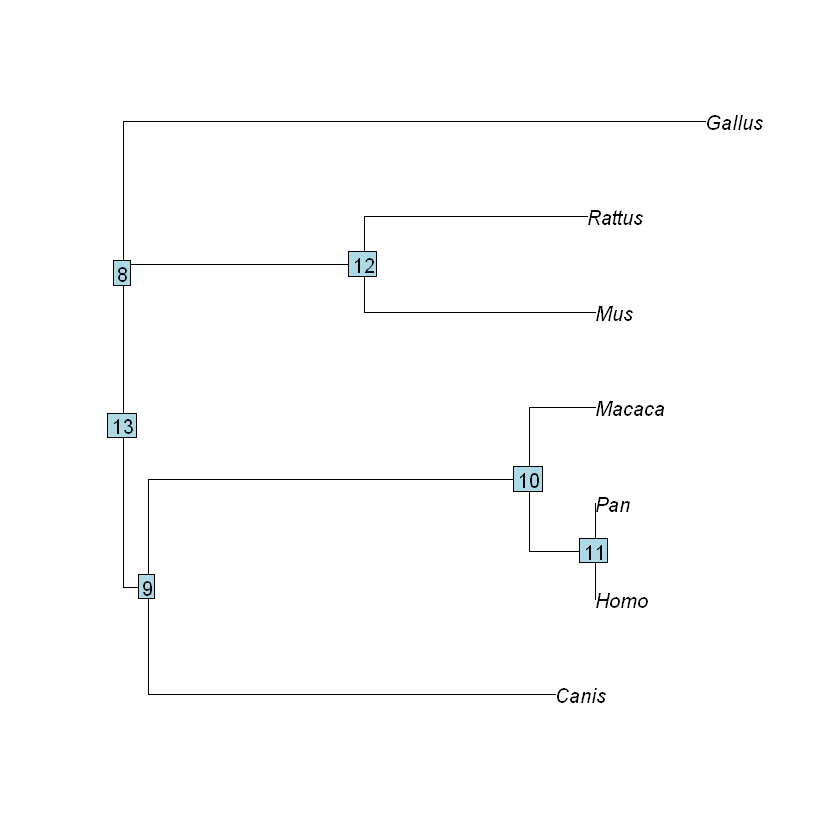

In [17]:
plot(t.prot)
nodelabels()

**4.5.** If we do not like the exact arrangement here, we can swap the tree at internal nodes.

In [18]:
t.prot<-rotate(t.prot,9)
plot(t.prot,main="Protein sequences")

### 5. Compare trees from different distance matrices

**5.1.** Now we have all the tools to create comparative plots to see the real differences between different distance calculations. To help further the visual inspection, we will plot the trees on the same pages, and we will add bars indicating the distance measure on the trees. Let's investigate the mathematical distances firs:

In [19]:
par(mfrow=c(2,2))
plot(root(nj(d.rna.n),outgroup=7,resolve.root=T),main="mRNAsequences",sub="N")
add.scale.bar(length=10)
plot(root(nj(d.rna.ts),outgroup=7,resolve.root=T),main="mRNA sequences",sub="TS")
add.scale.bar(length=10)
plot(root(nj(d.rna.tv),outgroup=7,resolve.root=T),main="mRNA sequences",sub="TV")
add.scale.bar(length=10)
plot(root(nj(d.rna.raw),outgroup=7,resolve.root=T),main="mRNA sequences",sub="Raw")
add.scale.bar(length=0.05)
par(mfrow=c(1,1))

**5.2.** And the same for the evolutionary distances:

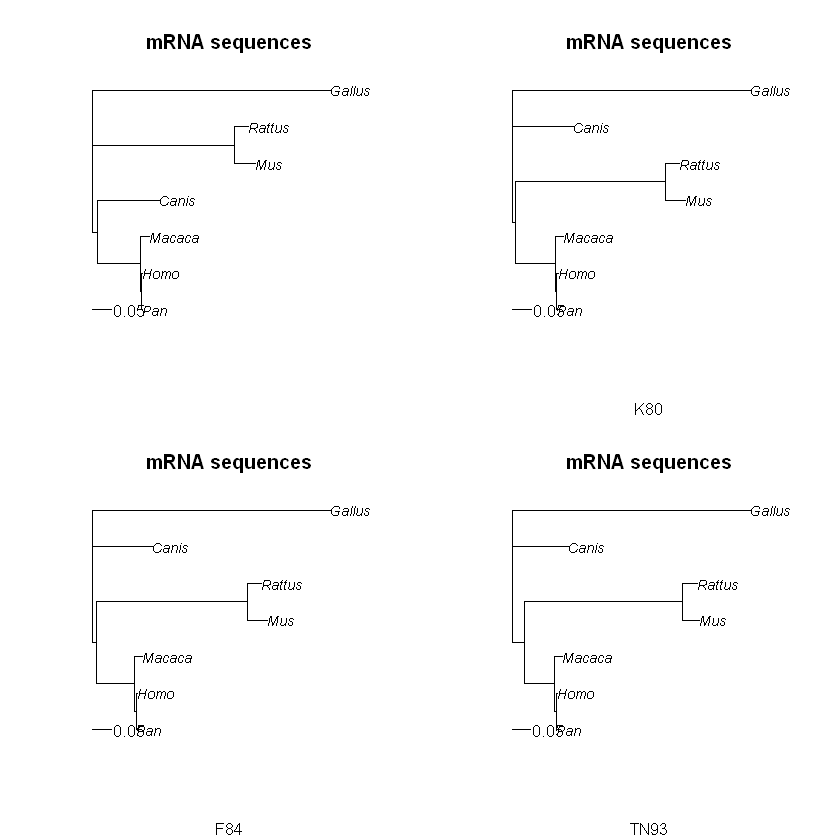

In [20]:
par(mfrow=c(2,2))
t.rna<-root(nj(d.rna.JC69),outgroup=7,resolve.root=T)
plot(t.rna,main="mRNA sequences")
add.scale.bar(length=0.05)
plot(root(nj(d.rna.K80),outgroup=7,resolve.root=T),main="mRNA sequences",sub="K80")
add.scale.bar(length=0.05)
plot(root(nj(d.rna.F84),outgroup=7,resolve.root=T),main="mRNA sequences",sub="F84")
add.scale.bar(length=0.05)
plot(root(nj(d.rna.TN93),outgroup=7,resolve.root=T),main="mRNA sequences",sub="TN93")
add.scale.bar(length=0.05)
par(mfrow=c(1,1))

**5.3.** We have a possibility to compare two trees directly. For example, are the trees coming from the protein and mRNA sequences the same or not?

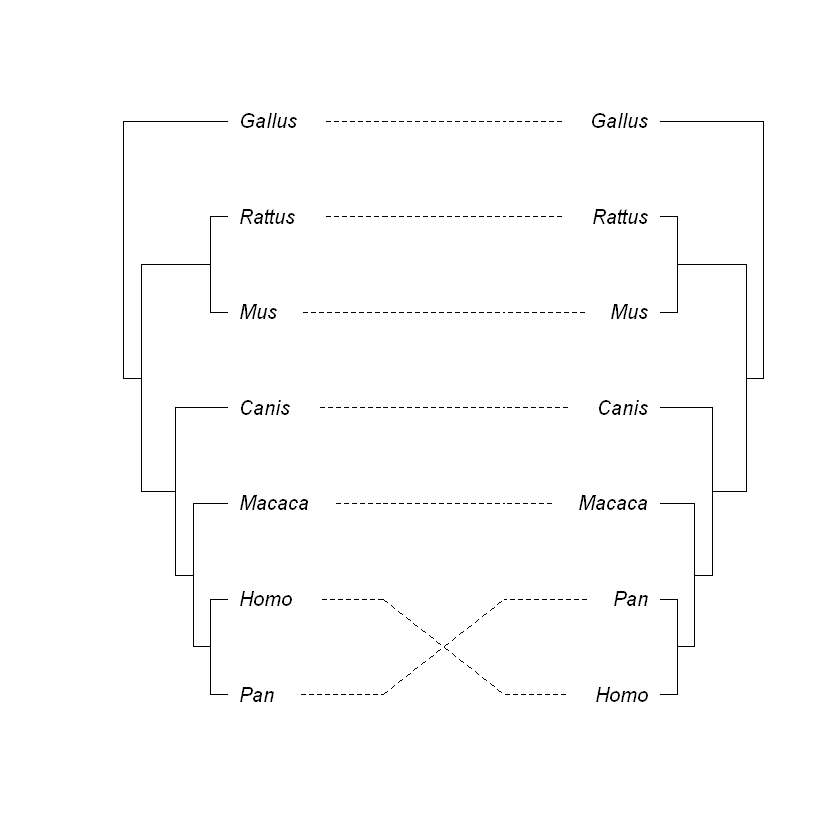

In [21]:
A<-matrix(t.rna$tip.label,nrow=7,ncol=2)
cophyloplot(t.rna,t.prot,A,space=25,lty=2)

### 6. Saving plots into files

**6.1.** If we want to save these nice plots into files, we have to use the graphics facility R offers. R is capable of using several devices for plotting. A device can be our monitor in front of us, or a PDF, JPEG, or TIFF file the same way. For example, to save the last nice co-plot with two trees into a PDF file, we have to call the **pdf()** function, and all plotting command will draw into a file. We have to close the file using the **dev.off()** function to have R release the file. After that it can be opened with other software.

In [22]:
pdf("IL6_cophyloplot.pdf",paper="a4")
cophyloplot(t.rna,t.prot,A,space=25,lty=2)
dev.off()

png 
  2

**6.2.** Or having amore complex example:

In [23]:
pdf("IL6_trees.pdf",paper="a4")
par(mfrow=c(2,2))
plot(root(nj(d.rna.n),outgroup=7,resolve.root=T),main="mRNAsequences",sub="N")
add.scale.bar(length=10)
plot(root(nj(d.rna.raw),outgroup=7,resolve.root=T),main="mRNA sequences",sub="Raw")
add.scale.bar(length=0.05)
plot(root(nj(d.rna.JC69),outgroup=7,resolve.root=T),main="mRNA sequences",sub="JC69")
add.scale.bar(length=0.05)
plot(t.prot,main="Protein sequences",sub="Similarity")
add.scale.bar(length=0.05)
dev.off()

png 
  2

## Parsimony

This part of the exercise will demonstrate you the concept of parsimony. As you remember from the lecture, parsimony is used to evaluate the relationship of a given tree and an observed pattern of feature. We attempt to calculate that what is the least amount of mutation we need to match a given tree and the observed character states. Remember, character state can be a morphological feature, but also an amino acid at a sequence site. In this practice we will use traditional morphological characters, but the method works exactly the same way for nucleotide sequences or proteins.

This exercise we will put all data directly to R, therefore we do not need any extra files. This part of the practice is based on Introduction to Tree-Thinking in R, using phylogenies of tetrapods by Nick Matzke from PhyloWiki. 
See: http://phylo.wikidot.com/tree-thinking-with-r

## Exercises

### 7. Import phangorn package

**7.1.** We will use two libraries in this part: ape and phangorn. Package **ape** is used for
generating and plotting the phylogenetic tree, while **phangorn** is used for parsimony
related calculations and for reconstructing character states of ancient common ancestors.

In [24]:
library(phangorn)

Warning message:
"package 'phangorn' was built under R version 3.6.3"

### 8. Create tree

The first step is to create a tree that we will use as reference throughout this part. We will use a tree published previously in the literature.

**8.1.** We will use the Newick notation to provide the species, the tree topology and branch length as a string.

In [25]:
vert_plusDinos_newick_str <-  "('shark':471,
(tuna:432,(lungfish:416,(frog:352.6457263,
(((((((((kiwi:71.06707278,seagull:71.06707278):60,Confuciusornis:5)
:20,Archaeopteryx:5):7.1992512,Velociraptor:80):30,Brontosaurus:50):
25,crocodile:213.266324):38.01256425,turtle:251.2788883):20.2733676,
((wall_lizard:134.7070246,(snake:127.5268735,anole_lizard:127.5268735):
7.180151025):85.293,Tuatara:220):51.5522313):42.65854432,(platypus:187.9246145,
(opossum:147.3778793,human:147.3778793):40.5467352):126.2861857):38.43492607):
63.35427375):16):41);"

**8.2.** At this point, the variable **vert_plusDinos_newick_str** contains a string representing the tree. We will use the **read.tree()** function to convert this string to a tree obbject. Normally, this function is used to read similar information from a file, but R is smart enough to handle this string in a variable as if it would be a file.

In [26]:
vert_plusDinos_phylo <- read.tree(file="", text=vert_plusDinos_newick_str)
vert_plusDinos_phylo$tip.label

[1] "shark"          "tuna"           "lungfish"       "frog"          
 [5] "kiwi"           "seagull"        "Confuciusornis" "Archaeopteryx" 
 [9] "Velociraptor"   "Brontosaurus"   "crocodile"      "turtle"        
[13] "wall_lizard"    "snake"          "anole_lizard"   "Tuatara"       
[17] "platypus"       "opossum"        "human"

**8.3.** As you can see, we have the tree object in the vert_plusDinos_phylo variable. There are several parts of this object, among others tip.label, which shows you what species are present on this tree. Let’s visualize this tree to have an idea about what is the subject of our analysis:

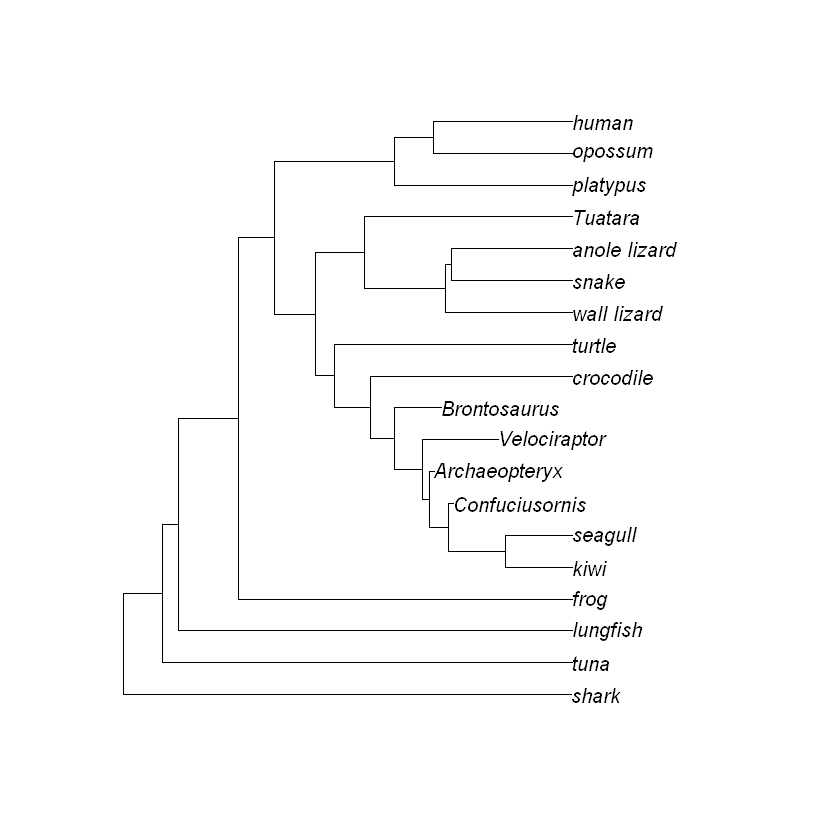

In [27]:
plot(vert_plusDinos_phylo)

**8.4.** This might be interesting, but let’s beef up this image by adding the time scale as the horizontal axis, and some text to explain what we are looking at.

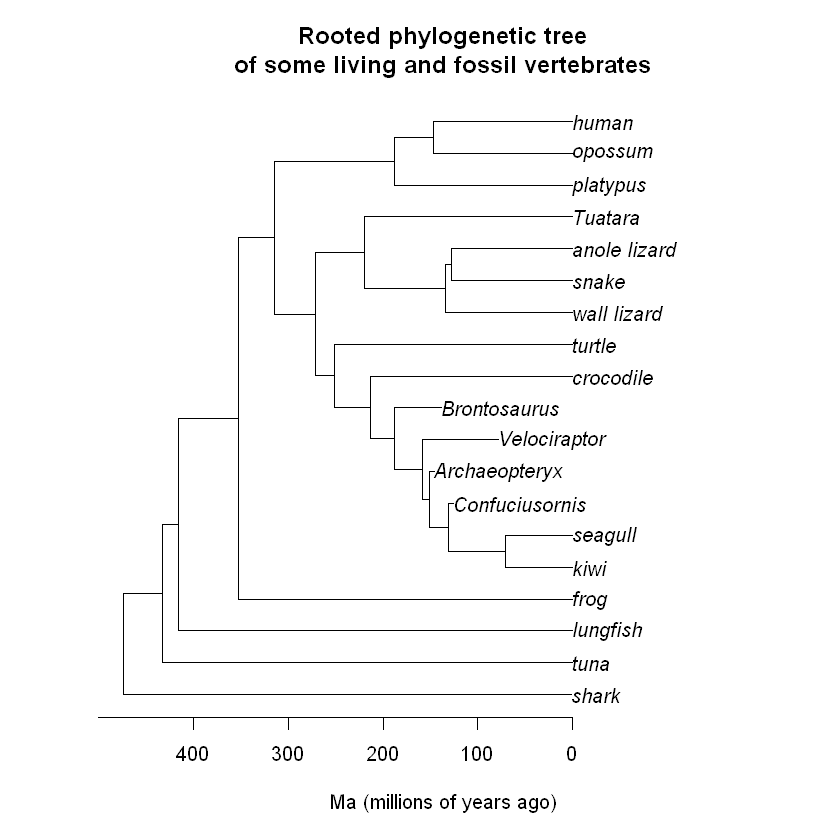

In [28]:
plot(vert_plusDinos_phylo)
title("Rooted phylogenetic tree\nof some living and fossil vertebrates")
axisPhylo()
mtext(side=1, text="Ma (millions of years ago)", line=3)

**8.5.** Questions to consider:

8.5.1. Can you see the traditional vertebrate (gerinces) groups on this tree (fishes, amphibians, reptiles, birds, mammals)? Which are monophyletic (monofiletikus csoport = egy közös rendszertani őstől származó élőlények összessége)? Which are polyphyletic? (polifiletikus csoport =  élőlények egyes hasonló jellemvonásain alapuló csoport, amely több ősre vezethető vissza, tagjainak hasonló tulajdonságai egymástól teljesen függetlenül jöttek létre)

monophiletic: reptiles: Tuatara, anole lizard, snake, wall lizard, turtle, crocodile

polyphyletic: kiwi, crocodile -> egg layers

8.5.2. When someone says, "Actually, birds are a type of dinosaur", what do they mean?
Birds and dinosaurs are relatively close on the tree. Kiwi, seagull and Confuciusornis are birds, but Archeopterix is a dinosaur.

### 9. Let’s investigate how feathered flight has appeared in evolution. 
We know that on our tree, only three specias are capable of this kind of flying: seagull, Confuciusornis which is an extinct bird like animal, and the famous Archaeopteryx.

**9.1.** We have to code this information into a data format which is usable in R. A **named vector** can hold values just like any other vector, but they are associated with arbitrary names.

In [29]:
feathered_flight_data <- c(0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0)
names(feathered_flight_data) <- c("shark","tuna","lungfish",
                                  "frog","kiwi",
                                  "seagull","Confuciusornis",
                                  "Archaeopteryx","Velociraptor",
                                  "Brontosaurus","crocodile",
                                  "turtle","wall_lizard",
                                  "snake","anole_lizard",
                                  "Tuatara","platypus",
                                  "opossum","human")
feathered_flight_data['tuna']
feathered_flight_data['seagull']

tuna 
   0

seagull 
      1

**9.2.** We will turn this named vector to the **phyDat** class which is coming from the phangorn package to use it in further analysis.

In [30]:
state_names <- c("no feathered flight", "feathered flight")
data_levels <- c(0, 1)
feathered_flight <- phyDat(feathered_flight_data, type = "USER", levels=data_levels)
feathered_flight

19 sequences with 1 character and 1 different site patterns.
The states are 0 1 

**9.3.** Let’s put together this information with the phylogenetic tree. Visualization helps to understand the evolutionary events causing the observed pattern.

In [31]:
state_colors <-  c("brown", "blue")
nexus_to_tree_tiporder <-  match(x=names(feathered_flight_data),
                                 table=vert_plusDinos_phylo$tip.label)
colors_to_plot <-  state_colors[1+as.numeric(feathered_flight_data)[nexus_to_tree_tiporder]]

plot(vert_plusDinos_phylo, label.offset=15)
axisPhylo()
mtext(side=1, text="Ma (millions of years ago)", line=3)

tiplabels(text=NULL, tip=1:length(vert_plusDinos_phylo$tip.label), col=colors_to_plot, bg=colors_to_plot, pch=21, cex=1)
legend(x="topleft", legend=state_names, fill=state_colors, cex=0.75)

**9.4.** Looking at this figure, you should consider the following questions:

9.4.1. According to this phylogeny, and the distribution of the “feathered flight” character, how many times do you think feathered flight evolved? At which branches?

Feathered flight evolved once, between Archeopterix and Velociraptor.

9.4.2. How many times do you think “feathered flight” was lost? At which branches?

Feathered flight was lost once, between seagull and kiwi, because kiwi can't fly.

**9.5.** As you remember from the lecture, character fit is a score which talks about how many times a character appeared and disappeared in a given tree and an observed pattern. Lets calculate this for our tree and feathered flight data using the **parsimony()** function from **phangorn**.

In [32]:
feathered_flight_fit <- parsimony(tree=vert_plusDinos_phylo, 
                             data=feathered_flight, 
                             method="fitch", 
                             site="pscore")
feathered_flight_fit

[1] 2

**9.6.** Questions to be answered:

9.6.1. What is the character fit score here according to your previous visual inspection, and the calculations?

The score is 2, because feathered flight appeared once, and disappeared once.

9.6.2. Are they the same or different? Can you explain if they are different?

They are different in a way I counted 1 amd 1 for appearance and disappearance, but the score is summarising this.

**9.7.** Let’s investigate the actual mutation events. For that, we will have to reconstruct the character for the internal nodes of the tree and visualize them as we did previously:

In [33]:
ancestral_states <- ancestral.pars(tree=vert_plusDinos_phylo, data=feathered_flight, type="MPR", cost=NULL, return="prob")

plotAnc(tree=vert_plusDinos_phylo, data=ancestral_states, i=1, site.pattern=TRUE, col=state_colors, pos=NULL, cex=0.5)
axisPhylo()

titletxt <- paste0("Mapping of ancestral states under Fitch parsimony")
title(titletxt)
mtext(side=1, text="Ma (millions of years ago)", line=3)
legend(x="topleft", legend=state_names, fill=state_colors, cex=0.5)

parsimony_txt <- paste0("parsimony score\n(# of steps) = ", feathered_flight_fit) 
text(x=-8, y=16, labels=parsimony_txt, pos=4, cex=0.7)

**9.8.** Questions we can answer from the plot:

9.8.1. Approximately when did feathered flight evolve? You can get an approximate minimum and maximum date.

Approximately 155-150 Ma ago. (Velocirapor's and the other branch's common ancestor is the maximum, and Archeopterix's and the other branch's common ancestor is the minimum)

9.8.2. Can we estimate when kiwi lost its ability to fly?

Somewhere between 80-0 Ma ago.

### 10. We will repeat this exercise using data on tetrapod viviparity: giving birth to living offsprings. 
tetrapod viviparity = négylábú elevenszülő

oviparity = tojásrakók 

Animals that lay eggs external to the body exhibit “oviparity”. Here, we want to explore the research question if it is true that live birth is a defining characteristic of mammals.

**10.1.** In our dataset, only humans and opossums do not lay eggs. At first, we will code the data to a **named vector** again, then code it into the **phyDat** class to use for character fit and ancestor state calculations:

In [34]:
viviparity_data <- c(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1)
names(viviparity_data) <- c("shark","tuna","lungfish",
                            "frog","kiwi",
                            "seagull","Confuciusornis",
                            "Archaeopteryx","Velociraptor",
                            "Brontosaurus","crocodile",
                            "turtle","wall_lizard",
                            "snake","anole_lizard",
                            "Tuatara","platypus",
                            "opossum","human")

state_names <- c("oviparity", "viviparity")
data_levels <- c(0, 1)
viviparity <- phyDat(viviparity_data, type = "USER", levels=data_levels)
viviparity

19 sequences with 1 character and 1 different site patterns.
The states are 0 1 

**10.2.** It is time to calculate the character fit for viviparity, and state reconstruction:

In [35]:
viviparity_fit <- parsimony(tree=vert_plusDinos_phylo, 
                                  data=viviparity, method="fitch", site="pscore")
viviparity_fit
ancestral_states_vivi <- ancestral.pars(tree=vert_plusDinos_phylo, 
                                        data=viviparity, type="MPR", 
                                        cost=NULL, return="prob")

[1] 1

**10.3.** And let’s visualize again the whole analysis:

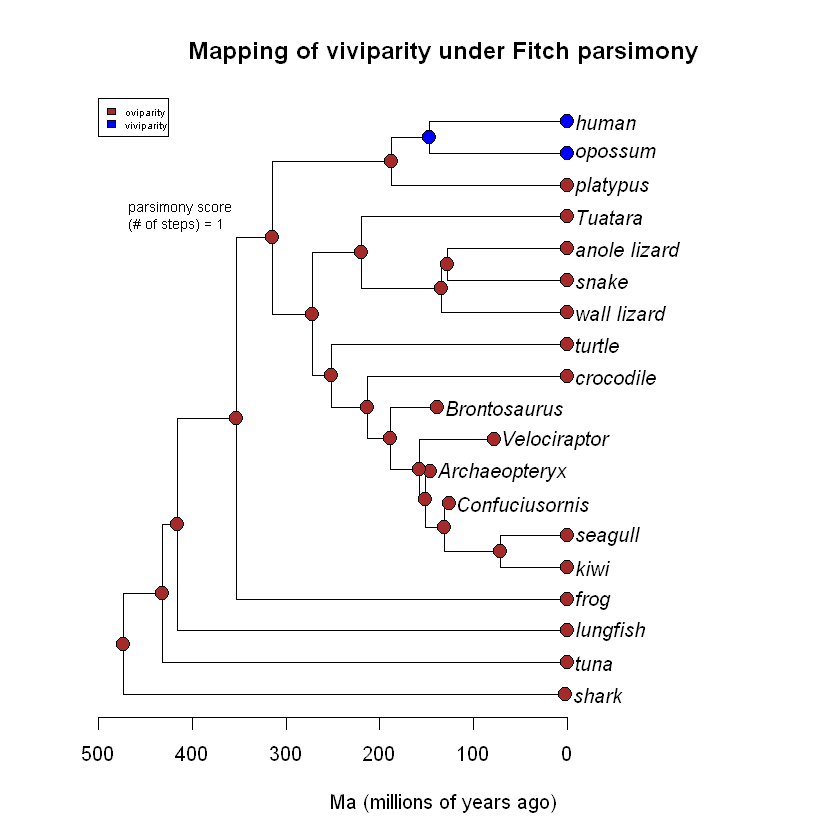

In [36]:
plotAnc(tree=vert_plusDinos_phylo, data=ancestral_states_vivi, 
        i=1, site.pattern=TRUE, col=state_colors, pos=NULL, cex=0.5)
axisPhylo()

titletxt <- paste0("Mapping of viviparity under Fitch parsimony")
title(titletxt)
mtext(side=1, text="Ma (millions of years ago)", line=3)
legend(x="topleft", legend=state_names, fill=state_colors, cex=0.5)

parsimony_txt_vivi <- paste0("parsimony score\n(# of steps) = ", viviparity_fit) 
text(x=-8, y=16, labels=parsimony_txt_vivi, pos=4, cex=0.7)

**10.4.** Questions we want to answer:

10.4.1. How many times this kind of viviparity has evolved?

It appeared once.

10.4.2. When viviparity has appeared?

Approximately 170 Ma ago.

10.4.3. Is viviparity a common feature of all mammals? (What about poor platypus?)

No, platypus is a mammal, but it lay eggs.

10.4.4. Is viviparity a homology or a homoplasy on this tree?

It is homology.

homology = it appears once, and it disappears slowly

homoplasy = It can appear more times, and it disappears quickly.

10.4.5. What is the tree length of this given tree considering feathered flight and viviparity together?

Approximately 310 Ma.

# Optional Homework

Deadline: 12 November 2020. 16:00

E-mail: bevbioinfo@gmail.com 

Subject: homework-week8-lab_group_[group_number]

Reward: max 1 point

Submit: This ipynb file, named as <your_name>_<your_lab_group>_week8-homework_2020.ipynb containing the solutions of Exercises 11.1, 11.2 and 11.3.


### 11. Try to repeat the character fit calcualation for the following characters:


**11.1.** Hair on the skin (as opposed to scales or feathers)

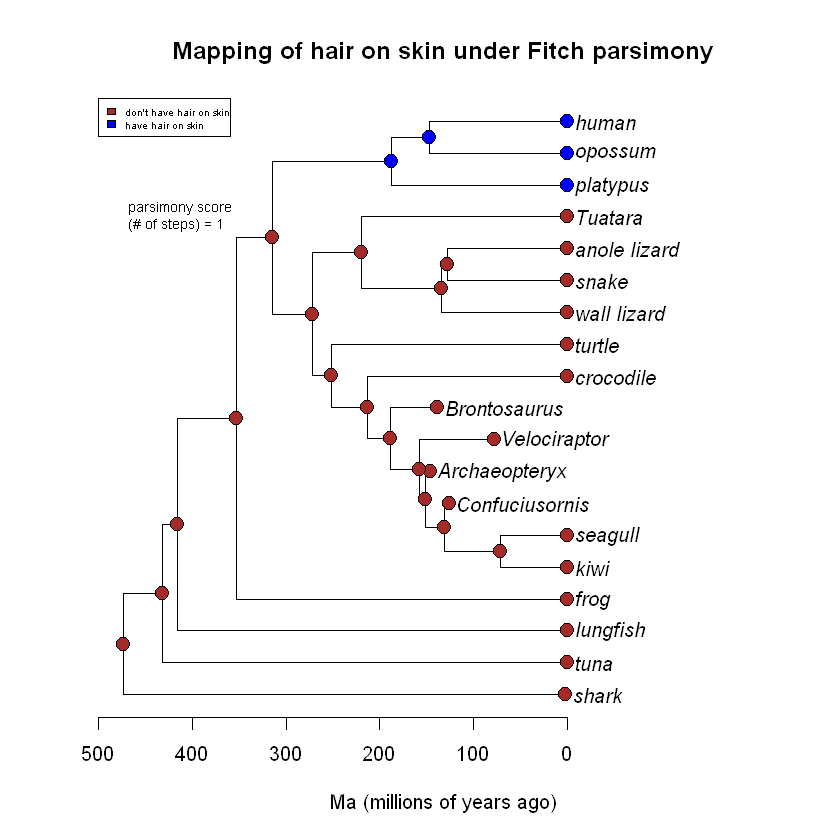

In [37]:
hair_on_skin_data <- c(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1)
names(hair_on_skin_data) <- c("shark","tuna","lungfish",
                            "frog","kiwi",
                            "seagull","Confuciusornis",
                            "Archaeopteryx","Velociraptor",
                            "Brontosaurus","crocodile",
                            "turtle","wall_lizard",
                            "snake","anole_lizard",
                            "Tuatara","platypus",
                            "opossum","human")

state_names <- c("don't have hair on skin", "have hair on skin")
data_levels <- c(0, 1)
hair_on_skin <- phyDat(hair_on_skin_data, type = "USER", levels=data_levels)

hair_on_skin_fit <- parsimony(tree=vert_plusDinos_phylo, 
                                  data=hair_on_skin, method="fitch", site="pscore")
ancestral_states_hair_on_skin <- ancestral.pars(tree=vert_plusDinos_phylo, 
                                        data=hair_on_skin, type="MPR", 
                                        cost=NULL, return="prob")

plotAnc(tree=vert_plusDinos_phylo, data=ancestral_states_hair_on_skin, 
        i=1, site.pattern=TRUE, col=state_colors, pos=NULL, cex=0.5)
axisPhylo()

titletxt <- paste0("Mapping of hair on skin under Fitch parsimony")
title(titletxt)
mtext(side=1, text="Ma (millions of years ago)", line=3)
legend(x="topleft", legend=state_names, fill=state_colors, cex=0.5)

parsimony_txt_hair_on_skin <- paste0("parsimony score\n(# of steps) = ", hair_on_skin_fit) 
text(x=-8, y=16, labels=parsimony_txt_hair_on_skin, pos=4, cex=0.7)

Platypus also have hair on skin, just like the members of the group of viviparity. This property is monophiletic, because the individuals are from a common ancestor, and homology, because the property appears only once, and doesn't disappear. The property developed approximately between 350-180 Ma ago. 

**11.2.** Having lung for breathing

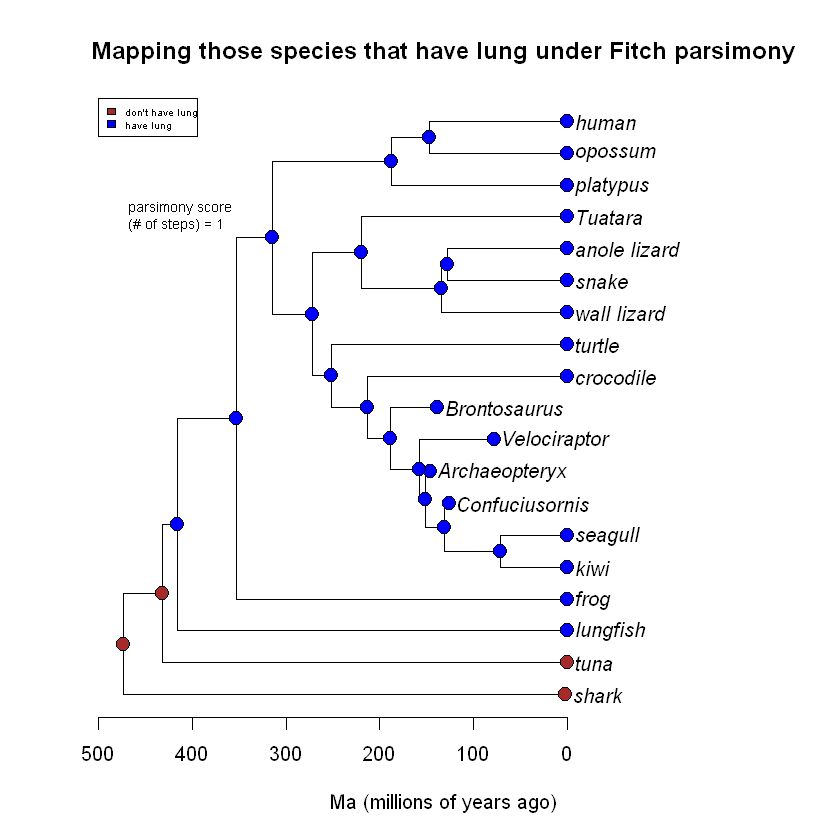

In [38]:
have_lung_data <- c(0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)
names(have_lung_data) <- c("shark","tuna","lungfish",
                            "frog","kiwi",
                            "seagull","Confuciusornis",
                            "Archaeopteryx","Velociraptor",
                            "Brontosaurus","crocodile",
                            "turtle","wall_lizard",
                            "snake","anole_lizard",
                            "Tuatara","platypus",
                            "opossum","human")

state_names <- c("don't have lung", "have lung")
data_levels <- c(0, 1)
have_lung <- phyDat(have_lung_data, type = "USER", levels=data_levels)

have_lung_fit <- parsimony(tree=vert_plusDinos_phylo, 
                                  data=have_lung, method="fitch", site="pscore")
ancestral_states_have_lung <- ancestral.pars(tree=vert_plusDinos_phylo, 
                                        data=have_lung, type="MPR", 
                                        cost=NULL, return="prob")

plotAnc(tree=vert_plusDinos_phylo, data=ancestral_states_have_lung, 
        i=1, site.pattern=TRUE, col=state_colors, pos=NULL, cex=0.5)
axisPhylo()

titletxt <- paste0("Mapping those species that have lung under Fitch parsimony")
title(titletxt)
mtext(side=1, text="Ma (millions of years ago)", line=3)
legend(x="topleft", legend=state_names, fill=state_colors, cex=0.5)

parsimony_txt_have_lung <- paste0("parsimony score\n(# of steps) = ", have_lung_fit) 
text(x=-8, y=16, labels=parsimony_txt_have_lung, pos=4, cex=0.7)

This property is also monophiletic and homology. The property appeared approximately 420-410 Ma ago.



**11.3.** Having warm blood (Dinosaurs: Google and form hypothesis!)

In [39]:
warm_blooded_data <- c(0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1)
names(warm_blooded_data) <- c("shark","tuna","lungfish",
                            "frog","kiwi",
                            "seagull","Confuciusornis",
                            "Archaeopteryx","Velociraptor",
                            "Brontosaurus","crocodile",
                            "turtle","wall_lizard",
                            "snake","anole_lizard",
                            "Tuatara","platypus",
                            "opossum","human")

state_names <- c("cold blooded", "warm blooded")
data_levels <- c(0, 1)
warm_blooded <- phyDat(warm_blooded_data, type = "USER", levels=data_levels)

warm_blooded_fit <- parsimony(tree=vert_plusDinos_phylo, 
                                  data=warm_blooded, method="fitch", site="pscore")
ancestral_states_warm_blooded <- ancestral.pars(tree=vert_plusDinos_phylo, 
                                        data=warm_blooded, type="MPR", 
                                        cost=NULL, return="prob")

plotAnc(tree=vert_plusDinos_phylo, data=ancestral_states_warm_blooded, 
        i=1, site.pattern=TRUE, col=state_colors, pos=NULL, cex=0.5)
axisPhylo()

titletxt <- paste0("Mapping warm blooded species under Fitch parsimony")
title(titletxt)
mtext(side=1, text="Ma (millions of years ago)", line=3)
legend(x="topleft", legend=state_names, fill=state_colors, cex=0.5)

parsimony_txt_warm_blooded <- paste0("parsimony score\n(# of steps) = ", warm_blooded_fit) 
text(x=-8, y=16, labels=parsimony_txt_warm_blooded, pos=4, cex=0.7)

Based on Google, dinosaurs were much more like birds and mammals than modern-day lizards and snakes. Dinosaurs grew quickly, for example, and have body postures and physical abilities that required a very active, hot-running metabolism to accomplish. Small, feathery dinosaurs may have had physiologies like modern birds, while giant dinosaurs may have relied on the physics of heat gain and loss to modulate their warmth. 
(https://www.discovermagazine.com/planet-earth/were-dinosaurs-warm-or-cold-blooded)

So as a conclusion, I set the flying dinosaurs as warm blooded, but the other dinosaurs cold blooded. The appearance of flying could have been the reason, why the warm blooded property appeared again independently from mammals. Therefore this property is polyphiletic. Since the warm blooded property haven't disappeared, it is a homology. Interestingly, the appearance of warm blooededness in the case of mammals is approximately the same as the case of birds, about 190 Ma ago.